<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

## Ames Iowa Housing Dataset.

### Reading in and looking over the data.

In [0]:
# Import Pandas:
import pandas as pd

In [0]:
# Read in the Ames Iowa Housing Dataset:
# Source: https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv
iowa = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [3]:
# Look at the first 5 rows:
iowa.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the shape of the dataset:
iowa.shape

(1460, 81)

In [5]:
# Set the options to display all rows:
pd.set_option('display.max_rows', 100)

# Describe the dataset numerical values:
iowa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Describe the non-numeric values:
iowa.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
# Show data types:
iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
# Just want to see just the first 10:
iowa.dtypes[:10]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
dtype: object

In [9]:
# View the first 10 rows of the `BedroomAbvGr` column:
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [10]:
# Using the "dot method" to call columns:
# Using the "dot method" has limitations such as, you can only use one column at
#   a time and you can not use a column that has spaces.
iowa.Fireplaces.head(10)

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    2
8    2
9    2
Name: Fireplaces, dtype: int64

In [11]:
# Can also us the "bracket method" to call columns and gets the same results
#   as above when using the "dot method".
# This is the best method to use because you are not limited like in the 
#   "dot method" with what you can call.
iowa['Fireplaces'].head(10)

0    0
1    1
2    1
3    1
4    1
5    0
6    1
7    2
8    2
9    2
Name: Fireplaces, dtype: int64

In [12]:
# View 2 columns at once:
# Can only do this with the "bracket method"
iowa[['Fireplaces', 'BedroomAbvGr']].sample(10)

,Fireplaces,BedroomAbvGr
377,1,4
319,2,3
270,1,3
617,0,2
822,1,3
891,1,3
1275,0,4
946,1,3
29,0,1
343,1,2


In [13]:
# Look at some columns that have float values:
# Look at the first 10 rows of the `LotFrontage` column:
iowa['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [14]:
# `LotFrontage` does not seem to have a reason for being a float value.
# Look at the possible values first and show the NaN:
iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [15]:
# NaN is the most common value in this column.
# What is NaN? Stands for Not a Number.
# Import numpy:
import numpy as np
np.nan

nan

In [16]:
# View the data type for NaN:
type(np.nan)

float

In [17]:
# NaN is considered a float and that is why the `LotFrontage` column is a float.
# Find out how much missing data is in the column:
iowa['LotFrontage'].isnull().sum()

259

In [18]:
# Look at the shape of the dataset for comparision:
iowa['LotFrontage'].shape

(1460,)

In [0]:
# First make sure why your data is missing.
# Also see if you can replace the missing values with something meaningful.
# The bet way is to drop the missing values because it can skew your data.
# Drop the missing data:
iowa['LotFrontage'].dropna(inplace=True)

In [20]:
# Rerun the shape to see if the missing data is gone now:
iowa['LotFrontage'].shape

(1201,)

In [21]:
# Check the column data type again:
iowa['LotFrontage'].dtype

# This column is still showing as a float. This means that the missing values
#   were not the only reason why it was typed as a float.

dtype('float64')

In [22]:
# Can make a smaller dataframe with a few specific column headers by passing
#   a list of column headers inside the square brackets.
# This should work but it is best to add the .copy to the end.
small = iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()

# View a random sample of the new dataset:
small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
16,1004,1004,0,149000
222,713,811,741,179900
201,1196,1279,0,171500
1414,833,1053,795,207000
1318,1753,1787,0,275000


In [23]:
# Add up all of the square footage to get a single square footage column for 
#   the whole house:
# You use bracket syntax to make a new `TotalSquareFootage` column:
small['TotalSF'] = small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']

# View the first 5 rows:
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [24]:
# Make another new column for `PricePerSqFt` by dividing the price by the
#   square footage.
small['PricePerSF'] = small['SalePrice'] / small['TotalSF']

# View the first 5 rows:
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


In [25]:
# When using crosstabs focus on categorical variables.
# View all columns in our dataset:
iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
# What are some categorical columns?
# Look at samples of some of the columns and run multiple times to verify they
#   are categorical:
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
132,Reg,NaN,Pave,Normal
868,IR2,NaN,Pave,Normal
516,IR1,NaN,Pave,Abnorml
604,IR1,NaN,Pave,Normal
555,Reg,NaN,Pave,Normal


In [27]:
# Values of `SaleCondition` column:
# What are the various variable available in this category?
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

### Cleaning the dataset.

In [28]:
# Create a new categorical variable using np.where and passing in a condition:
# np.where best used for binary situations. It can be used for non-binary but 
# is more diffcult to use.
iowa['NormalCondition'] = np.where(iowa['SaleCondition']=='Normal', "yes", "no")

# Get value counts on new variable:
iowa['NormalCondition'].value_counts()

yes    1198
no      262
Name: NormalCondition, dtype: int64

In [29]:
# Value counts on another categorical variable:
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [30]:
# Trim (map) this down from 4 values to only 3 values:
# In this case np.where will not be the best to use.
# .map expects a dictionary which is defined using { }.
# It is a series of key value pairs mapping old to new.
iowa['LotShape3'] = iowa['LotShape'].map({'Reg':'Regular',
                                          'IR1':'Irregular',
                                          'IR2':'Other',
                                          'IR3':'Other'})

# Get value counts on new variable:
iowa['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [31]:
# Check value counts on another categorical variable:
iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [32]:
# Another way to map categorical variables:
# Replacing using .loc:
# This is step #1:
iowa['top_neighbors']='All Others'
iowa[['top_neighbors', 'Neighborhood']].head()

,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge


In [33]:
# Step #2 - remap just the ones I want using .loc to create a filter:
# A filter will specify what I want to rename.
iowa.loc[iowa['Neighborhood']=='NAmes', 'top_neighbors']='North Ames'

# View a sample of the data with the new variables:
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
165,All Others,Edwards
15,All Others,BrkSide
168,All Others,Gilbert
1194,All Others,Sawyer
232,All Others,BrDale
1288,All Others,StoneBr
743,All Others,Sawyer
738,All Others,Edwards
33,North Ames,NAmes
1291,All Others,BrDale


In [34]:
# Can do this multiple times if need to:
iowa.loc[iowa['Neighborhood']=='CollgCr', 'top_neighbors']='College Circle'
iowa.loc[iowa['Neighborhood']=='Gilbert', 'top_neighbors']='Favorite Neighborhood'
iowa.loc[iowa['Neighborhood']=='Somerst', 'top_neighbors']='Favorite Neighborhood'

# View a sample of the data with the new variables:
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
430,All Others,BrDale
227,All Others,BrDale
256,Favorite Neighborhood,Somerst
981,All Others,NoRidge
925,All Others,NWAmes
730,All Others,StoneBr
987,All Others,NridgHt
1072,All Others,Edwards
202,All Others,OldTown
139,College Circle,CollgCr


In [35]:
# Check your work by running value counts:
iowa['top_neighbors'].value_counts()

All Others               920
North Ames               225
Favorite Neighborhood    165
College Circle           150
Name: top_neighbors, dtype: int64

### Comparing the data.

In [36]:
# Use a crosstab to compare neighborhoods by lot shape:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,294,23,603
College Circle,53,11,86
Favorite Neighborhood,71,15,79
North Ames,66,2,157


In [37]:
# Add margins to get the `All` columns:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,294,23,603,920
College Circle,53,11,86,150
Favorite Neighborhood,71,15,79,165
North Ames,66,2,157,225
All,484,51,925,1460


In [38]:
# Add proportions to get % of variables in index then in columns:
# Add margins to show them all equalling 100%:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='index', 
            margins=True)
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='columns', 
            margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.146694,0.294118,0.085405,0.113014
North Ames,0.136364,0.039216,0.169730,0.154110


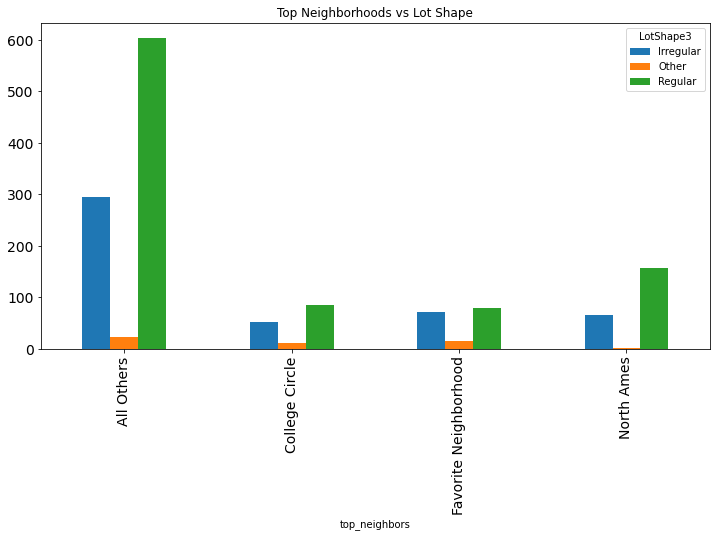

In [138]:
# Add a new variable to display your results using a bar chart:
myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])
myresults.plot(kind='bar', title='Top Neighborhoods vs Lot Shape',
               fontsize=14, figsize=(12,6));

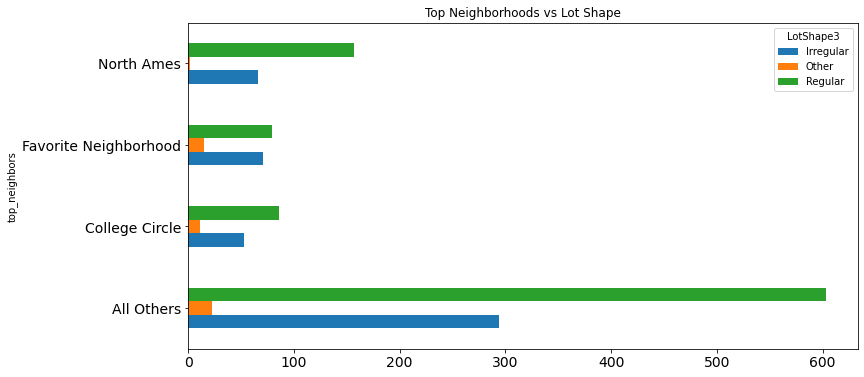

In [40]:
# Now create a horizontal bar chart of myresults:
myresults.plot(kind='barh', title='Top Neighborhoods vs Lot Shape',
               fontsize=14, figsize=(12,6));

## Lending Club Loan Stats dataset.

### Reading in and looking over the data.

In [41]:
# Load in a new data set in a zip file from Lending Club:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-05-11 06:46:27--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.26.240.115, 54.71.0.232, 50.112.20.251
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.26.240.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [    <=>             ]  22.05M  2.85MB/s    in 7.9s    

2020-05-11 06:46:36 (2.80 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



In [42]:
# Unzip the zipped folder from Lending Club:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [43]:
# Read in the new csv file:
loans = pd.read_csv('LoanStats_2018Q4.csv')
loans.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100            80   

In [44]:
# View the tail of the dataset:
loans.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2751.79 2751.79 3053.17 3053.17 2248.21 804.96  0.0 0.0 0.0 Apr-2020 169.83 May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5411.74 5276.45 5882.88 5735.81 4588.26 1294.62 0.0 0.0 0.0 Apr-2020 327.68 May-2020 Apr-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   5626.39 5626.39 6400.05 6400.05 4373.61 2026.44 0.0 0.0 0.0 Apr-2020 356.08 May-2020 Apr-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

### Cleaning the dataset.

In [45]:
# There are extra rows at the top and bottom and Pandas is reading it like all
#   columns but the last one is indexes. Need to correct these issues.
# We can fix the header issue by using the 'skiprows' parameter:
loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2)

# Check the head of the new dataset:
loans.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Check the tail of the new dataset:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Sum up the null values by column and sort from least to greatest:
pd.set_option('display.max_rows', 144)
loans.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127661
settlement_term                               127661
settlement_date                               127661
debt_settlement_flag_date                     127661
settlement_status                             127661
settlement_amount                             127661
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          117705
hardship_status                               117691
hardship_reason                               117691
hardship_dpd                                  117690
hardship_length                               117690
payment_plan_start_date                       117690
hardship_end_date                             117690
hardship_start_date                           

In [0]:
# Drop the columns that are made up of all NaN values:
loans.drop('url', axis=1, inplace=True)

In [49]:
# Check that the column has been dropped:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,4442.75,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,2248.21,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,4588.26,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,4373.61,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Look at the first 10 vallues of the int_rate column:
loans['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [51]:
# Look at a specific value from the int_rate column:
loans['int_rate'][3]

# Has 2 things wrong with it. #1 it has a leading space in front. #2 the % is 
#   hard coded in there as a string because it has '' around it.

' 14.47%'

In [52]:
# Confirm our findings:
loans['int_rate'].dtype

# 'O' confirms it is an object type.

dtype('O')

In [53]:
# Another way to confirm it is to look at the type on the specific value:
type(loans['int_rate'][3])

# This verifies that this is a string value.

str

In [0]:
# There are 3 problems that we need to address:
# The first is the string column should be numeric (float).
# Second is the % is included with the number.
# Third is the leading space at the beginning of the string.

# Start with just fixing a single string:
# If we can fix one, then we can usually fix all of them.
int_rate = ' 14.47%'

In [55]:
# Remove the leading space:
int_rate.strip()

'14.47%'

In [56]:
# Remove the %:
int_rate.strip('%')

' 14.47'

In [57]:
# Remove both using the "chain method":
int_rate.strip().strip('%')

'14.47'

In [58]:
# "Cast" the string value to a float by hard coding it in:
float('14.47')

14.47

In [59]:
# Put it all together:
float(int_rate.strip().strip('%'))

14.47

In [60]:
# Now check your work by calling in what type it is now:
type(float(int_rate.strip().strip('%')))

float

In [0]:
# Write a function that will make our solution reusable:
# Write a funtion that can do what we have written above to any string that is
#   passed into it.
def myfunc(cell_contents):
    return float(cell_contents.strip().strip('%'))

In [62]:
# Test out the new function by calling it on our example:
myfunc(int_rate)

14.47

In [63]:
# Is the new function a correct data type?
type(myfunc(int_rate))

float

In [0]:
# Can now use a for loop to apply our solution to every cell in the column.
# This is not a recommended way to do it but it is a way to do it.
new_list = []
for cell in loans['int_rate']:
  new_list.append(myfunc(cell))

In [65]:
# Look at the first 10 values of that list using index values:
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [66]:
# Compare to the original values in the column on our dataset:
loans['int_rate'].head(10)

# Can also run it this way to get a clear look at it with the leading spaces:
list(loans['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [0]:
# Convert that list to a new column:
loans['int_rate_clean'] = pd.Series(new_list)

In [68]:
# Do a comparison to make sure that our method has worked:
loans[['int_rate', 'int_rate_clean']].sample(7)

,int_rate,int_rate_clean
124732,17.97%,17.97
31400,11.80%,11.80
95222,27.27%,27.27
16713,8.81%,8.81
113267,16.91%,16.91
59047,8.19%,8.19
46433,15.02%,15.02


In [69]:
# What is the data type of our new column?
loans['int_rate_clean'].dtype

dtype('float64')

In [0]:
# There is a better way to do this with the .apply function:
loans['int_rate_clean2'] = loans['int_rate'].apply(myfunc)

In [71]:
# Do a comparison to make sure that our method has worked:
loans[['int_rate', 'int_rate_clean', 'int_rate_clean2']].sample(7)

,int_rate,int_rate_clean,int_rate_clean2
11861,12.98%,12.98,12.98
43077,6.46%,6.46,6.46
40566,15.02%,15.02,15.02
19693,8.81%,8.81,8.81
97384,6.67%,6.67,6.67
24963,11.80%,11.80,11.80
110960,12.73%,12.73,12.73


In [72]:
# Look at the top 20 rows of the `emp_title` column:
loans['emp_title'].head(20)

0                          Sale Consultant
1                                Educator 
2                    Accounts Examiner III
3                                  teacher
4                           Claims Analyst
5                         Training Manager
6                             Tire builder
7               Program Support Assistant 
8                                   Driver
9                                   BANKER
10                        Business Analyst
11                                OPERATOR
12                        Shift Supervisor
13                                 Driver 
14    Assistant to the Treasurer (Payroll)
15               Reimbursement specialist 
16                       Financial Advisor
17                                Engineer
18                   Sales Account Manager
19                                     Cna
Name: emp_title, dtype: object

In [73]:
# Look at the 20 employment titles with all NaN values:
loans['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [74]:
# Find out how many different unique employment titles there are currently:
loans['emp_title'].unique()

# Get the shape of the whole dataset:
print(loans.shape)

# Check how many there are with a length statement:
len(loans['emp_title'].unique())

(128412, 145)


43893

In [75]:
# Another way to find out how many unique values there are is using .nunique:
loans['emp_title'].nunique()

43892

In [76]:
# How many times is the employment title null?
loans['emp_title'].isnull().sum()

20947

In [0]:
# Create some examples that represent the problems we want to clean up:
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [78]:
# Do the same function in individual steps:
type('Supervisor')

# You can also use isinstance to check that the data type is what it should be:
isinstance('Supervisor', str)

True

In [79]:
# Use the .strip method to clean it up:
' supervisor'.title().strip()

'Supervisor'

In [0]:
# Write a function to clean these up and increase uniformity:
def clean_title(jobtitle):
  if isinstance(jobtitle, str):
    return (jobtitle.title().strip())
  else:
    return 'Unknown'

In [81]:
# Test the new function:
clean_title(' superviSOR')

'Supervisor'

In [82]:
# Test new function on a NaN:
clean_title(np.nan)

'Unknown'

In [83]:
# Create a for loop:
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [84]:
# You can use list comprehensions to combine function calls and for loops over 
#   lists into one succinct and fairly readable single line of code.
# You get the same thing as above.
[clean_title(jobtitle) for jobtitle in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
# Now that we have a function that works as expected we have to apply it to 
#   our column.
# This time we are going to rewrite over the original column with .apply:
loans['clean_title'] = loans['emp_title'].apply(clean_title)

In [86]:
# Check our work by comparing old and new columns:
loans[['emp_title', 'clean_title']].sample(20)

,emp_title,clean_title
6354,Respiratory Therapist,Respiratory Therapist
86875,Help Desk Shift Lead,Help Desk Shift Lead
72265,Senior Superintendent,Senior Superintendent
16241,NaN,Unknown
43241,Union Laborer,Union Laborer
2369,Technical Program Manager,Technical Program Manager
21561,supervisor,Supervisor
120308,NaN,Unknown
127387,Server,Server
53214,NaN,Unknown


In [87]:
# Look at the top 20 employment titles:
loans['clean_title'].value_counts().head(20)

Unknown               20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: clean_title, dtype: int64

In [88]:
# How many unique employment titles are there now?
# Do a comparison between the two columns:
print (loans['emp_title'].nunique())
loans['clean_title'].nunique()

43892


34902

In [89]:
# How often is the employment_title null (NaN)?
loans['emp_title'].isnull().sum()

20947

### Working with datetimes.

In [90]:
# Call the head on loans:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_clean,int_rate_clean2,clean_title
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,...,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,16.14,Sale Consultant
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,2433.74,...,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.80,11.80,Educator
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,...,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31,11.31,Accounts Examiner Iii
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,3024.11,...,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,Teacher
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,4219.75,...,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,27.27,27.27,Claims Analyst


In [91]:
# List all of the columns:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_clean2', 'clean_title'],
      dtype='object', length=146)

In [92]:
# Check out one column with a datetime value:
loans['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [93]:
# Need to convert those to a true datetime type.
# Can do it using a for loop:
mylst = []
for col in loans.columns:
  if col.endswith('_d'):
    mylst.append(col)
mylst

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [94]:
# Can also do this as a list comprehension:
my_date_cols = [col for col in loans.columns if col.endswith('_d')]
my_date_cols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [95]:
# Look at the data type on one value in the column:
type(loans['issue_d'][0])

str

In [0]:
# Since this string is a common datetime format (%m-%y), we can use Pandas to 
#   detect and translate this for us.
# Create a new column and use pd.to_datetime and infer_datetime_format=True:
loans['new_issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)

In [97]:
# Check our work by comparing the 2 columns:
loans[['issue_d', 'new_issue_d']].head()

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [98]:
# Check our work by checking the data type:
type(loans['new_issue_d'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [99]:
# Check the whole column data type:
print (loans['new_issue_d'].dtype)
loans['new_issue_d'].dtype

# Both are datetime data types.

datetime64[ns]


dtype('<M8[ns]')

In [100]:
# Call on just one value:
loans['new_issue_d'].head(1).values

# Looking at it this way you can see that it has the [year-month-day(which is 1
#   by default because no day was listed in the dataset)T(stands for time)Hour:
#   minutes:seconds.nano seconds] All of the time has been set to 0 because
#   there is no time in the dataset.

array(['2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [101]:
# Using the .dt accessor we can do some feature engineering to create some 
#   new features.
# Create a new feature called year to store just the year in:
loans['year'] = loans['new_issue_d'].dt.year
loans[['issue_d', 'new_issue_d', 'year']].head()

,issue_d,new_issue_d,year
0,Dec-2018,2018-12-01,2018
1,Dec-2018,2018-12-01,2018
2,Dec-2018,2018-12-01,2018
3,Dec-2018,2018-12-01,2018
4,Dec-2018,2018-12-01,2018


In [102]:
# Can do the same thing here for the month:
loans['month'] = loans['new_issue_d'].dt.month
loans[['issue_d', 'new_issue_d', 'year', 'month']].head()

,issue_d,new_issue_d,year,month
0,Dec-2018,2018-12-01,2018,12
1,Dec-2018,2018-12-01,2018,12
2,Dec-2018,2018-12-01,2018,12
3,Dec-2018,2018-12-01,2018,12
4,Dec-2018,2018-12-01,2018,12


In [103]:
# Can also do this for the weekday:
loans['weekday'] = loans['new_issue_d'].dt.weekday
loans[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(10)

# With weekday you get 0=Sun, 1=Mon, 2=Tues, 3=Wed, 4=Thur, 5=Fri, 6=Sat

,issue_d,new_issue_d,year,month,weekday
66773,Nov-2018,2018-11-01,2018,11,3
8085,Dec-2018,2018-12-01,2018,12,5
4660,Dec-2018,2018-12-01,2018,12,5
122322,Oct-2018,2018-10-01,2018,10,0
2625,Dec-2018,2018-12-01,2018,12,5
91581,Oct-2018,2018-10-01,2018,10,0
98037,Oct-2018,2018-10-01,2018,10,0
24331,Dec-2018,2018-12-01,2018,12,5
67038,Nov-2018,2018-11-01,2018,11,3
20520,Dec-2018,2018-12-01,2018,12,5


In [104]:
# Check your work by looking at the data types:
print (loans['issue_d'].dtype)
print (loans['new_issue_d'].dtype)
print (loans['year'].dtype)
print (loans['month'].dtype)
print (loans['weekday'].dtype)

object
datetime64[ns]
int64
int64
int64


In [105]:
# Can do the same thing with a different variable:
loans['new_pull'] = pd.to_datetime(loans['last_credit_pull_d'])
loans['month_pull'] = loans['new_pull'].dt.month
loans[['last_credit_pull_d', 'new_pull', 'month_pull']].head()

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,12.0
1,Apr-2020,2020-04-01,4.0
2,Feb-2020,2020-02-01,2.0
3,Apr-2020,2020-04-01,4.0
4,Apr-2020,2020-04-01,4.0


In [0]:
# You can calculate the difference:
loans['day_diff'] = loans['new_issue_d'] - loans['new_pull']

In [107]:
# Put them all side by side to check them out:
loans[['last_credit_pull_d', 'new_pull', 'day_diff']].head()

,last_credit_pull_d,new_pull,day_diff
0,Dec-2019,2019-12-01,-365 days
1,Apr-2020,2020-04-01,-487 days
2,Feb-2020,2020-02-01,-427 days
3,Apr-2020,2020-04-01,-487 days
4,Apr-2020,2020-04-01,-487 days


In [108]:
# Look at the last 5 value counts:
loans['day_diff'].value_counts().sort_index().tail()

-30 days     87
0 days      475
30 days      73
31 days      33
61 days       1
Name: day_diff, dtype: int64

In [109]:
# What is the oldest credit history in Q4 2018?
# Need to look at the `earliest_cr_line` column to determine this:
loans['earliest_cr_line'].value_counts().sort_index().head()

Apr-1960    1
Apr-1962    1
Apr-1963    3
Apr-1964    4
Apr-1965    2
Name: earliest_cr_line, dtype: int64

In [0]:
# The column is not a datetime type. Need to convert it first:
 loans['new_earliest_cr_line'] = pd.to_datetime(loans['earliest_cr_line'], 
                                                infer_datetime_format=True)

In [111]:
# Need to check my work now using dtype:
print (loans['new_earliest_cr_line'].dtype)

datetime64[ns]


In [112]:
# Now I can use sort_index to get my oldest credit line:
loans['new_earliest_cr_line'].value_counts().sort_index().head()

1950-01-01    2
1950-07-01    1
1954-01-01    2
1954-03-01    1
1956-01-01    1
Name: new_earliest_cr_line, dtype: int64

In [140]:
# Import date from datetime:
from datetime import date

# Code to give me the difference from oldest credit line to Dec 2018:
old = date(1950, 1, 1)
Q4 = date(2018, 12, 31)
oldest_cr_line = Q4 - old

# Print the # of days and the # of years:
print (oldest_cr_line.days)
print (oldest_cr_line.days / 365.25)

25201
68.99657768651609


### Convert 'term' to integer

In [114]:
# Convert the `term` column from string to integer:
# First need to look at the column:
list(loans['term'][:10])

[' 60 months',
 ' 36 months',
 ' 36 months',
 ' 60 months',
 ' 60 months',
 ' 36 months',
 ' 60 months',
 ' 36 months',
 ' 36 months',
 ' 36 months']

In [115]:
# Need to check for any missing values:
loans['term'].isnull().sum()

0

In [116]:
# Check the data type of the column:
loans['term'].dtype

dtype('O')

In [0]:
# There is a leading space and 'months' that need to be removed to make this
#   column into an integer.
# Need to create a function to change all values in the column:
def clean_data(my_cell):
  return (my_cell.str.strip(' months').str.strip().astype(int))

In [118]:
# Now need to run my new funtion on the entire column:
clean_data(loans['term']).sample(20)

91711     60
34828     36
75433     36
43545     60
82886     36
52913     36
85622     36
12422     60
55379     36
18022     36
2007      36
16058     36
2814      60
118804    36
127737    36
113239    60
21413     36
54381     60
3328      36
7437      36
Name: term, dtype: int64

In [0]:
# Need to add values to a new list:
my_list = clean_data(loans['term'])

In [121]:
# Check my work:
my_list.head(10)

0    60
1    36
2    36
3    60
4    60
5    36
6    60
7    36
8    36
9    36
Name: term, dtype: int64

In [0]:
# Create a new column with cleaned up `term` values:
loans['clean_term'] = pd.Series(my_list)

In [123]:
# Do a comparison of original `term` and `clean_term`:
loans[['term', 'clean_term']].sample(10)

,term,clean_term
108613,36 months,36
117587,60 months,60
70361,36 months,36
41494,36 months,36
10945,36 months,36
49352,60 months,60
31837,36 months,36
94825,60 months,60
31967,36 months,36
17508,60 months,60


### Make column 'loan_status_is_great'

Make a new column 'loan_status_is_great'

It should contain 
- 1 if loan_status is "Current" or "Fully Paid." 
- Else it should contain the integer 0.


In [124]:
# Show value counts on `loan_status`:
loans['loan_status'].value_counts()

Current               88581
Fully Paid            28378
Charged Off            8016
Late (31-120 days)     2055
In Grace Period         732
Late (16-30 days)       327
Default                 323
Name: loan_status, dtype: int64

In [125]:
# Create a new variable using .map:
loans['loan_status_is_great'] = loans['loan_status'].map({'Current':1,
                                                          'Fully Paid':1,
                                                          'Charged Off':0,
                                                          'Late (31-120 days)':0,
                                                          'In Grace Period':0,
                                                          'Late (16-30 days)':0,
                                                          'Default':0})
loans['loan_status_is_great'].value_counts()

1    116959
0     11453
Name: loan_status_is_great, dtype: int64

In [126]:
# Check my work:
loans[['loan_status', 'loan_status_is_great']].sample(10)

,loan_status,loan_status_is_great
32380,Current,1
93423,Current,1
53003,Current,1
103743,Current,1
19259,Current,1
5734,Current,1
75652,Current,1
115232,Current,1
28857,Fully Paid,1
111187,Charged Off,0


### Make 2 datetime new columns

Make last_pymnt_d_month and last_pymnt_d_year columns.

In [127]:
# Check the values in the column:
loans['last_pymnt_d'].head()

0    May-2019
1    Mar-2020
2    Feb-2019
3    Oct-2019
4    Mar-2020
Name: last_pymnt_d, dtype: object

In [128]:
# Check for missing values:
loans['last_pymnt_d'].isnull().sum()

159

In [133]:
# Clean missing values by replacing them with 0:
loans['clean_last_pymnt_d'] = loans['last_pymnt_d'].fillna(0)
loans['clean_last_pymnt_d'].isnull().sum()

0

In [0]:
# Create a new variable to apply the datetime type to:
loans['new_last_pymnt_d'] = pd.to_datetime(loans['clean_last_pymnt_d'], 
                                           infer_datetime_format=True)

In [131]:
# Check my work:
loans['new_last_pymnt_d'].head()

0   2019-05-01
1   2020-03-01
2   2019-02-01
3   2019-10-01
4   2020-03-01
Name: new_last_pymnt_d, dtype: datetime64[ns]

In [132]:
# Check for NaN values:
loans['new_last_pymnt_d'].isnull().sum()

0

In [135]:
# Create new columns with the .dt accessor for month:
loans['last_pymnt_d_month'] = loans['new_last_pymnt_d'].dt.month
loans[['last_pymnt_d', 'new_last_pymnt_d', 'last_pymnt_d_month']].head(10)

,last_pymnt_d,new_last_pymnt_d,last_pymnt_d_month
0,May-2019,2019-05-01,5
1,Mar-2020,2020-03-01,3
2,Feb-2019,2019-02-01,2
3,Oct-2019,2019-10-01,10
4,Mar-2020,2020-03-01,3
5,Mar-2020,2020-03-01,3
6,Mar-2020,2020-03-01,3
7,Mar-2020,2020-03-01,3
8,Mar-2020,2020-03-01,3
9,Dec-2019,2019-12-01,12


In [136]:
# Create new columns with the .dt accessor for year:
loans['last_pymnt_d_year'] = loans['new_last_pymnt_d'].dt.year
loans[['last_pymnt_d', 'new_last_pymnt_d', 'last_pymnt_d_year']].head(10)

,last_pymnt_d,new_last_pymnt_d,last_pymnt_d_year
0,May-2019,2019-05-01,2019
1,Mar-2020,2020-03-01,2020
2,Feb-2019,2019-02-01,2019
3,Oct-2019,2019-10-01,2019
4,Mar-2020,2020-03-01,2020
5,Mar-2020,2020-03-01,2020
6,Mar-2020,2020-03-01,2020
7,Mar-2020,2020-03-01,2020
8,Mar-2020,2020-03-01,2020
9,Dec-2019,2019-12-01,2019


In [137]:
# One last comparison with all side by side:
loans[['last_pymnt_d', 'new_last_pymnt_d', 'last_pymnt_d_month', 
       'last_pymnt_d_year']].head(10)

,last_pymnt_d,new_last_pymnt_d,last_pymnt_d_month,last_pymnt_d_year
0,May-2019,2019-05-01,5,2019
1,Mar-2020,2020-03-01,3,2020
2,Feb-2019,2019-02-01,2,2019
3,Oct-2019,2019-10-01,10,2019
4,Mar-2020,2020-03-01,3,2020
5,Mar-2020,2020-03-01,3,2020
6,Mar-2020,2020-03-01,3,2020
7,Mar-2020,2020-03-01,3,2020
8,Mar-2020,2020-03-01,3,2020
9,Dec-2019,2019-12-01,12,2019


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01